In [1]:
%load_ext autoreload
%autoreload 2

import os
import matplotlib.pyplot as plt
import numpy as np

from lens_simulation import utils
from lens_simulation.structures import SimulationParameters
from lens_simulation.Medium import Medium
from lens_simulation.Lens import Lens, LensType
from lens_simulation.beam import Beam, BeamSettings, BeamShape, BeamSpread, DistanceMode, generate_beam

from pprint import pprint

In [4]:
# create beam implementation

# 1. create sim parameters
# 2. create beam / lens
# 3. create sim stage
# 4  create options (log_dir)
# 5. propagate wavefront


In [3]:
from lens_simulation.Simulation import Simulation, propagate_wavefront, save_result_plots
from lens_simulation.structures import SimulationStage, SimulationResult, SimulationParameters, SimulationOptions

# sim parameters
sim_parameters = SimulationParameters(
    A = 10000, 
    pixel_size=1e-6, 
    sim_wavelength = 488e-9,
    sim_width = 1500e-6,
    lens_type=LensType.Cylindrical
)

# load config
config = utils.load_simulation_config()

# generate beam
beam = generate_beam(config["beam"], sim_parameters)

output_medium = Medium(1.33)

stage = SimulationStage(
    lens = beam.lens, 
    output=output_medium, 
    n_slices=10, 
    start_distance=beam.start_distance,
    finish_distance=beam.finish_distance,
    tilt={"x": beam.tilt[0], "y": beam.tilt[1]}
)

options = SimulationOptions(
    log_dir = "log/beam_test",
    save=False, 
    save_plot=False,
)

# beam propagation
result = propagate_wavefront(stage, sim_parameters, options, passed_wavefront = None)

# save plots
if options.save_plot:
    save_result_plots(result, stage, sim_parameters, os.path.join(options.log_dir, str(stage._id)))


The plane wave if constant along the optical axis. The beam final_width has been set to the initial width: 5.00e-04m
The beam_shape (BeamShape.Square) requires a symmetric beam. The beam height has been set to the beam width: 5.00e-04m 


ValueError: operands could not be broadcast together with shapes (1501,3001) (1501,1501) 

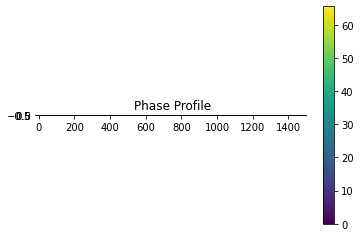

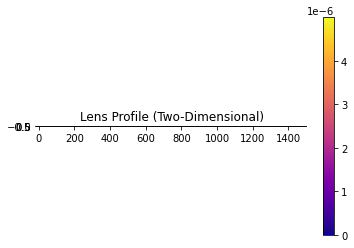

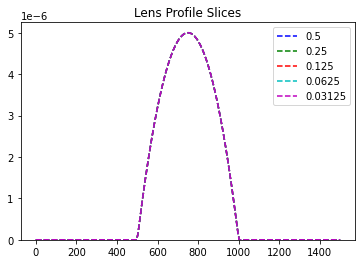

In [5]:
# lens
lens = Lens(diameter=500e-6, height=5e-6, exponent=2.0, medium=Medium(2.348))
lens.generate_profile(pixel_size=sim_parameters.pixel_size, lens_type=LensType.Cylindrical)

stage = SimulationStage(
    lens=lens,
    output=output_medium,
    n_slices=10, 
    start_distance=0,
    finish_distance=10e-3,
    _id=1
)

# lens propgation
result = propagate_wavefront(stage, sim_parameters, options, passed_wavefront = None)#result.propagation)

save_result_plots(result, stage, sim_parameters, os.path.join(options.log_dir, str(stage._id)))
